<a href="https://colab.research.google.com/github/Mtiwari27/DAV_62/blob/main/Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic :- Mosaic of Misdirection: A study in Crime Pattern Analysis [Criminology]**

Authors :-

1. Navneet Pujari (Roll No. 52)
2. Vignesh Shivhare (Roll No. 60)
3. Mukund Tiwari (Roll No. 62)

**Problem Statement :-** Crime Analysis

In contemporary society, crimes impose significant social and economic burdens, necessitating proactive measures for detection, analysis, and prediction. "Crime Analysis" aims to analyze the multifaceted challenges associated with crime mitigation and law enforcement.

**Citation -**

**1. Paper Read :-**

Sunil Yadav, Meet Timbadia, Ajit Yadav, Rohit Vishwakarma, Nikhilesh Yadav, Crime Pattern Detection, Analysis & Prediction, ICECA, 2017

https://ieeexplore.ieee.org/abstract/document/8203676

**2. Datasets :-**

https://ncrb.gov.in/crime-in-india-additional-table?year=2022&category=

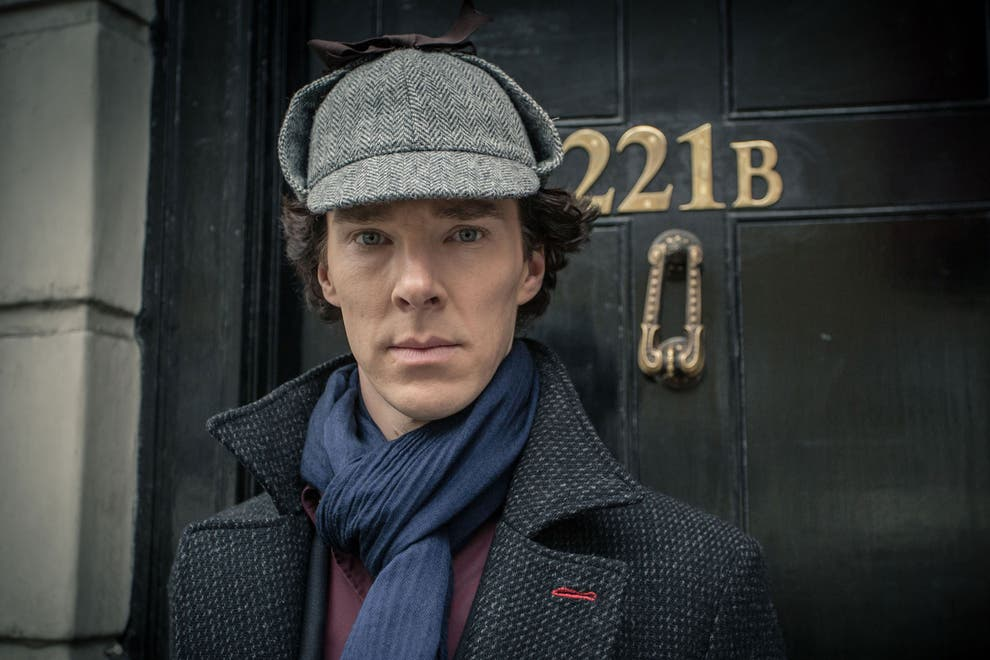

In [ ]:
# @title "The game is on!" - Sherlock Holmes
library(IRdisplay)

image_url <- "https://static.independent.co.uk/s3fs-public/thumbnails/image/2014/01/06/22/sherlock-bbc.jpg?quality=75&width=990&crop=3%3A2%2Csmart&auto=webp"

display_img <- function(img_url){
  temp_file <- tempfile()
  download.file(img_url, temp_file, mode = "wb")
  display_png(file = temp_file)
}

display_img(image_url)

**Exploratory Data Analysis :-**

In [ ]:
library(readxl)

In [ ]:
Maharashtra_IPCCrimes2022 <- read_excel("/content/sample_data/Maharashtra_IPCCrimes2022.xlsx")

New names:
• `Affray (Sec.159 & 160 IPC)` -> `Affray (Sec.159 & 160 IPC)...89`
• `Affray (Sec.159 & 160 IPC)` -> `Affray (Sec.159 & 160 IPC)...90`


In [ ]:
head(Maharashtra_IPCCrimes2022)

S. No,State/UT/District,Murder (Sec.302 IPC),Culpable Homicide not amounting to Murder (Sec.304 IPC),Causing Death by Negligence (Sec.304-A IPC) (Col.6+Col 9 to 12),Deaths due to Negligence relating to Road Accidents (Total) (Col.7+Col.8),Hit and Run,Other Accidents (other than Hit and Run),Deaths due to Negligence relating to Rail Accidents,Deaths due to Medical Negligence,⋯,Offences related to Mischief (Sec.428 to 433),"Arson (Sec.435, 436 & 438 IPC)",Criminal Trespass (Sec.447 to 452 IPC),Cruelty by Husband or his Relatives (Sec.498-A IPC),Circulate False/Fake News/Rumours (Sec.505 IPC/Sec.505 r/w IT Act),Criminal Intimidation (Sec.506 r/w Other IPC Crimes),Insult to the Modesty of Women (Sec.509 IPC),Miscellaneous IPC Crimes(Total),Other IPC Crimes,Total Cognizable IPC crimes
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Ahmednagar,94,12,786,780,326,454,0,0,⋯,90,0,168,451,0,0,30,3397,709,16283
2,Akola,37,3,131,131,0,131,0,0,⋯,56,23,58,246,0,0,4,2641,101,5944
3,Amravati Commr.,32,2,95,91,58,33,0,0,⋯,10,14,59,121,3,73,6,1495,206,4876
4,Amravati Rural,55,1,338,335,82,253,0,0,⋯,38,36,38,198,0,0,5,4536,30,8276
5,Aurangabad Commr.,43,3,188,187,68,119,0,0,⋯,0,20,76,253,2,0,10,1153,48,5345
6,Aurangabad Rural,42,6,440,437,34,403,0,0,⋯,12,26,93,310,0,0,3,1547,193,5838


In [ ]:
col_names <- colnames(Maharashtra_IPCCrimes2022)

The data comprises of **142** types of different types of **IPC** (Indian Penal Code) crimes

IPC has been replaced by Bharatiya Nyaya Sanhita (**BNS**) as of December 2023

BNS aims to give precedence to offences against women and children and offences against State.

In [ ]:
print(col_names)

  [1] "S. No"                                                                                                
  [2] "State/UT/District"                                                                                    
  [3] "Murder (Sec.302 IPC)"                                                                                 
  [4] "Culpable Homicide not amounting to Murder (Sec.304 IPC)"                                              
  [5] "Causing Death by Negligence (Sec.304-A IPC) (Col.6+Col 9 to 12)"                                      
  [6] "Deaths due to Negligence relating to Road Accidents (Total) (Col.7+Col.8)"                            
  [7] "Hit and Run"                                                                                          
  [8] "Other Accidents (other than Hit and Run)"                                                             
  [9] "Deaths due to Negligence relating to Rail Accidents"                                                  
 [10] "Dea

For our project we have choosen **19** of the 142 IPC crimes

In [ ]:
Crime_Type = c("Murder (Sec.302 IPC)",
               #death due to negligence - hit and run, medical negligence etc
               "Causing Death by Negligence (Sec.304-A IPC) (Col.6+Col 9 to 12)",
               "Hurt (Total) (Col.20 + Col.26)\n",
               "Assault on Women with Intent to Outrage her Modesty (Sec.354 IPC) (Total) (Col.36+Col.37+Col42 to 44)",
               "Kidnapping and Abduction (Total) (Col.46+ Col.49 to Col.55)\n",
               "Human Trafficking (U/S 370)",
               "Rape (Sec.376 IPC)",
               "Rioting (Total) (Col.70 to Col.85)\n",
               "Theft (Total) (Col.92+Col.93)\n",
               #Burglary (Total) (Col.95 + Col.96)
               "A) Day Time",
               "B) Night",
               "Extortion & Blackmailing (Sec.384 to 389 IPC)",
               "Robbery  (Sec.392/394/397 IPC)",
               "Dacoity  (Total) (Col.101+ Col.102)\n",
               "Counterfeiting (Total) (Col.109 to 112)\n",
               "Forgery, Cheating & Fraud  (Total) (Col.114+Col.119+Col.120)",
               "Offences relating to Adulteration or Sale of Food/Drugs (Sec.272/273/274/275/276 IPC)",
               "Arson (Sec.435, 436 & 438 IPC)",
               "Criminal Trespass (Sec.447 to 452 IPC)"
              )


In [ ]:
Maharashtra_IPCCrimes2022_proc <- Maharashtra_IPCCrimes2022[, c("State/UT/District",Crime_Type)]
col_names <- colnames(Maharashtra_IPCCrimes2022_proc)
head(Maharashtra_IPCCrimes2022_proc)

State/UT/District,Murder (Sec.302 IPC),Causing Death by Negligence (Sec.304-A IPC) (Col.6+Col 9 to 12),Hurt (Total) (Col.20 + Col.26),Assault on Women with Intent to Outrage her Modesty (Sec.354 IPC) (Total) (Col.36+Col.37+Col42 to 44),Kidnapping and Abduction (Total) (Col.46+ Col.49 to Col.55),Human Trafficking (U/S 370),Rape (Sec.376 IPC),Rioting (Total) (Col.70 to Col.85),Theft (Total) (Col.92+Col.93),A) Day Time,B) Night,Extortion & Blackmailing (Sec.384 to 389 IPC),Robbery (Sec.392/394/397 IPC),Dacoity (Total) (Col.101+ Col.102),Counterfeiting (Total) (Col.109 to 112),"Forgery, Cheating & Fraud (Total) (Col.114+Col.119+Col.120)",Offences relating to Adulteration or Sale of Food/Drugs (Sec.272/273/274/275/276 IPC),"Arson (Sec.435, 436 & 438 IPC)",Criminal Trespass (Sec.447 to 452 IPC)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ahmednagar,94,786,2797,707,580,3,112,800,4043,163,666,35,342,36,0,279,0,0,168
Akola,37,131,1388,218,122,0,28,54,789,12,83,18,40,2,1,89,0,23,58
Amravati Commr.,32,95,713,262,112,0,55,15,1184,152,116,5,66,4,0,141,2,14,59
Amravati Rural,55,338,1423,174,171,0,35,42,1028,21,132,3,25,6,1,112,0,36,38
Aurangabad Commr.,43,188,1095,240,224,0,49,108,1418,20,118,18,132,6,1,283,0,20,76
Aurangabad Rural,42,440,1232,215,127,0,31,295,1150,33,109,3,74,20,0,110,0,26,93


In [ ]:
new_column_names <- gsub("\\s*\\([^\\)]+\\)", "", col_names)
colnames(Maharashtra_IPCCrimes2022_proc) <- new_column_names
names(Maharashtra_IPCCrimes2022_proc)[which(names(Maharashtra_IPCCrimes2022_proc) == "A) Day Time")] <- "Burglary_Day"
names(Maharashtra_IPCCrimes2022_proc)[which(names(Maharashtra_IPCCrimes2022_proc) == "B) Night")] <- "Burglary_Night"
head(Maharashtra_IPCCrimes2022_proc)

State/UT/District,Murder,Causing Death by Negligence,Hurt,Assault on Women with Intent to Outrage her Modesty,Kidnapping and Abduction,Human Trafficking,Rape,Rioting,Theft,Burglary_Day,Burglary_Night,Extortion & Blackmailing,Robbery,Dacoity,Counterfeiting,"Forgery, Cheating & Fraud",Offences relating to Adulteration or Sale of Food/Drugs,Arson,Criminal Trespass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ahmednagar,94,786,2797,707,580,3,112,800,4043,163,666,35,342,36,0,279,0,0,168
Akola,37,131,1388,218,122,0,28,54,789,12,83,18,40,2,1,89,0,23,58
Amravati Commr.,32,95,713,262,112,0,55,15,1184,152,116,5,66,4,0,141,2,14,59
Amravati Rural,55,338,1423,174,171,0,35,42,1028,21,132,3,25,6,1,112,0,36,38
Aurangabad Commr.,43,188,1095,240,224,0,49,108,1418,20,118,18,132,6,1,283,0,20,76
Aurangabad Rural,42,440,1232,215,127,0,31,295,1150,33,109,3,74,20,0,110,0,26,93


**Model discussed in the Paper :-**

*K-means Clustering* :-

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into distinct groups, or clusters, based on similarities in their features. The algorithm iteratively assigns data points to the nearest cluster centroid and then recalculates the centroids based on the mean of the data points assigned to each cluster. This process continues until the centroids no longer change significantly, or a specified number of iterations is reached.

In brief, the steps of the K-means algorithm are as follows:

1.   Initialization: Randomly select K initial cluster centroids.
2.   Assignment: Assign each data point to the nearest centroid based on a distance metric, typically Euclidean distance.
3.   Update: Recalculate the centroids by taking the mean of all data points assigned to each cluster.
4.   Repeat: Iterate steps 2 and 3 until convergence criteria are met, such as minimal centroid movement or reaching a maximum number of iterations.




**Performance Parameters :-**

Hierarchical clustering performance parameters typically include:

1. Inter-cluster distance: Measures the dissimilarity between clusters, such as average linkage, complete linkage, or single linkage.
  
2. Intra-cluster distance: Measures the compactness of clusters, indicating how similar the data points within a cluster are to each other.
  
3. Dendrogram: A visual representation of the hierarchical clustering process, showing the order in which clusters are merged and the distances at which they are merged.
  
4. Cluster purity: Measures how well-defined and homogeneous the clusters are. It evaluates whether data points within a cluster belong to the same class or category.
  
5. Silhouette coefficient: Measures the quality of clustering by calculating the average distance between data points within the same cluster and the average distance between data points in different clusters.
  
6. Calinski-Harabasz index: Evaluates clustering performance based on the ratio of between-cluster dispersion to within-cluster dispersion.

These parameters help assess the effectiveness and quality of hierarchical clustering algorithms in partitioning data into meaningful clusters.

**Implementation Code :-**

*Model Comparison :-*


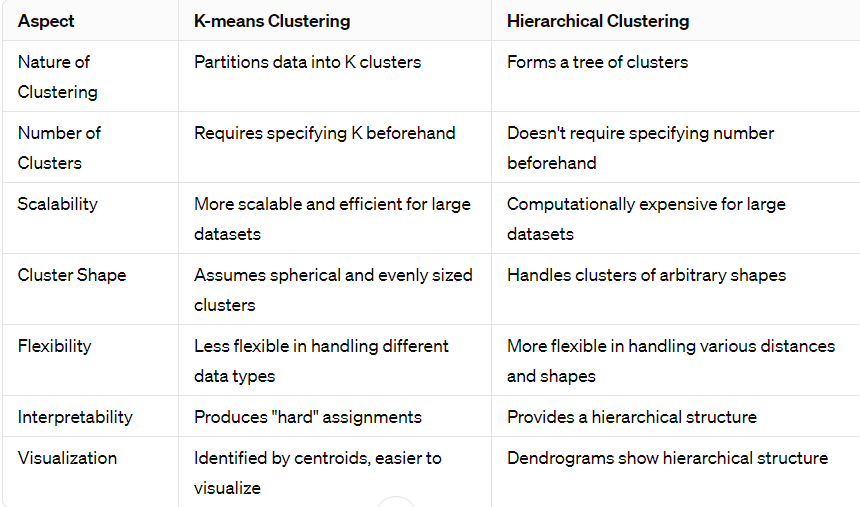

Adding a **cluster** field to the dataset, using **hierarchical clustering** to divide data into 3 clusters

In [ ]:
crime_data_for_clustering <- Maharashtra_IPCCrimes2022_proc[, -1]

scaled_data <- scale(crime_data_for_clustering)
hc <- hclust(dist(scaled_data), method = "ward.D2")

clusters <- cutree(hc, k = 3)

Maharashtra_IPCCrimes2022_proc$Cluster <- clusters

*Data Visualization :-*

In [ ]:
library(ggplot2)

In [ ]:
options(repr.plot.width =12, repr.plot.height =12)

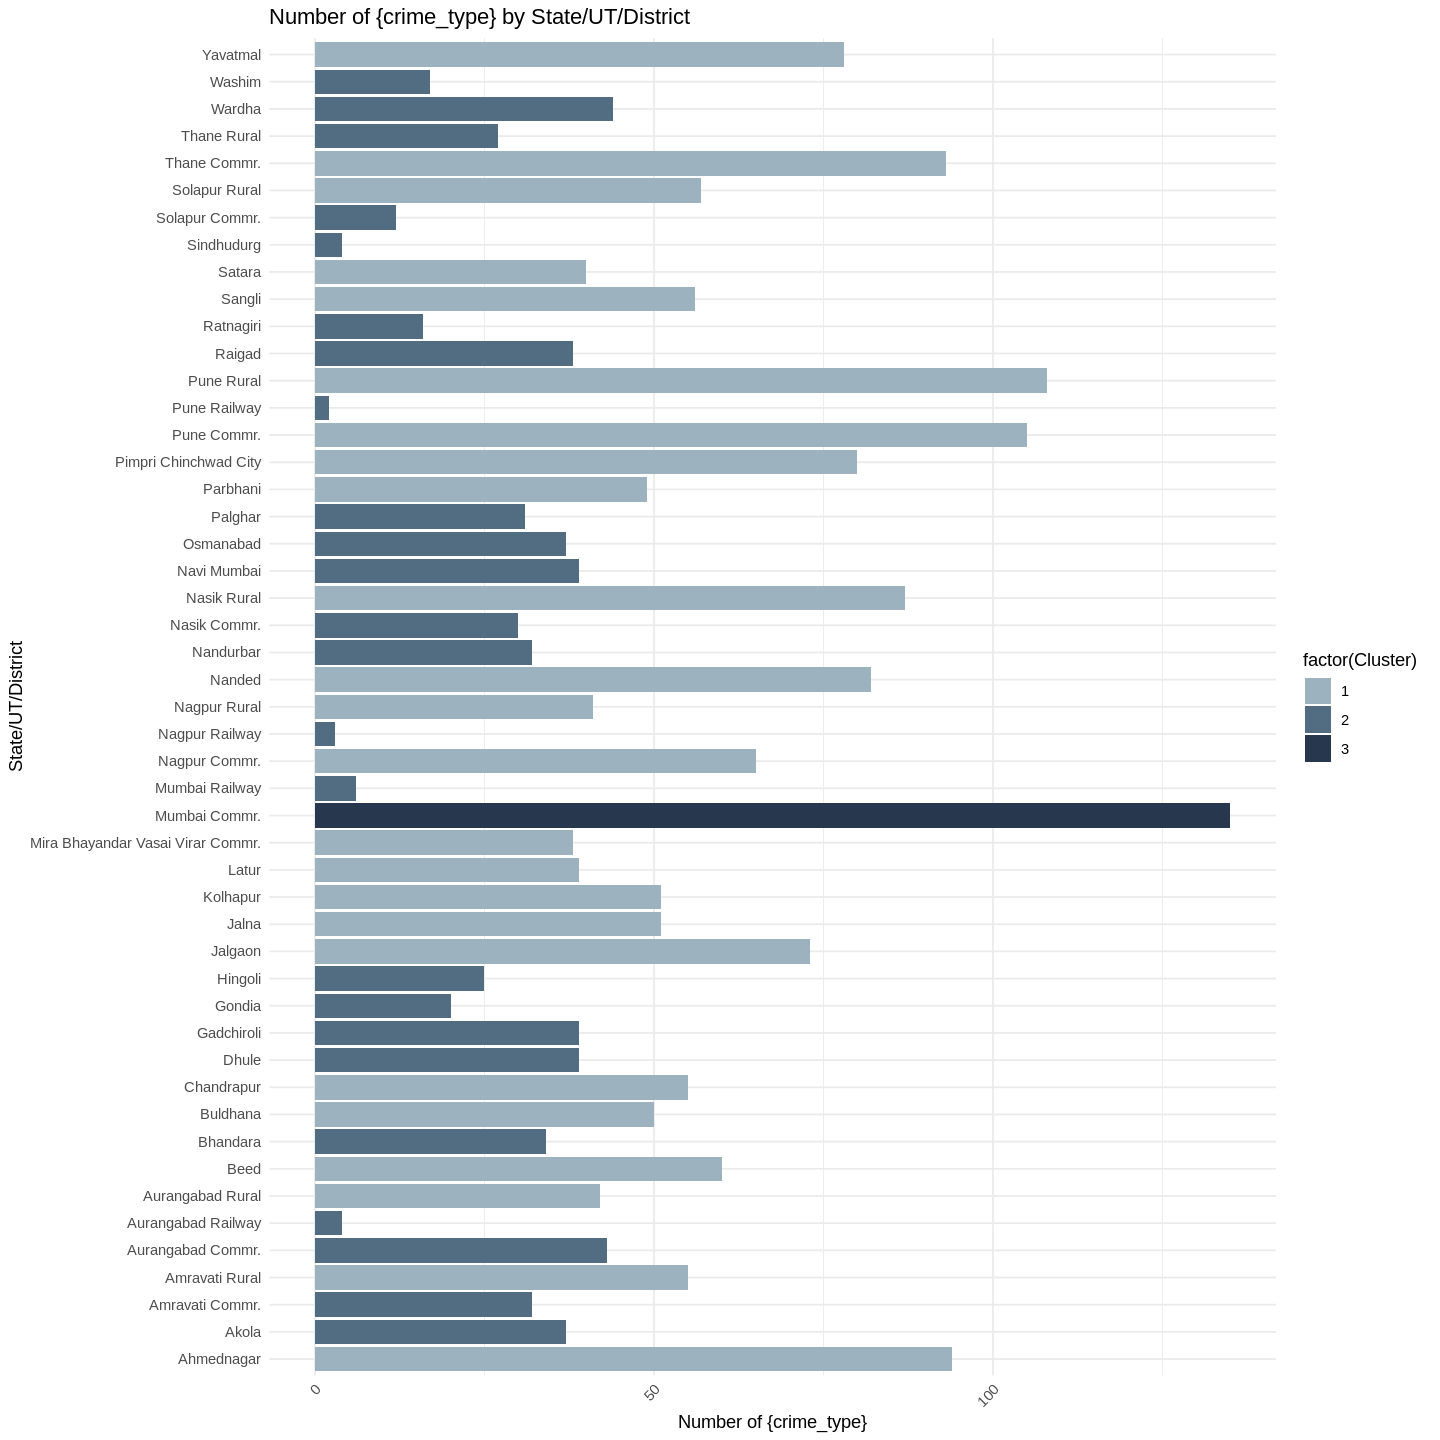

In [ ]:
plot_crime_state <- function(district,crime_type) {
  ggplot(district, aes(y = `State/UT/District`, x = {{ crime_type }}, fill = factor(Cluster))) +
    geom_bar(stat = "identity") +
    scale_fill_manual(values = c("#9DB2BF", "#526D82", "#27374D"))+
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(
      title = "Number of {crime_type} by State/UT/District",
      y = "State/UT/District",
      x = "Number of {crime_type}"
    )
}

plot_crime_state(Maharashtra_IPCCrimes2022_proc,`Murder`)

**Mumbai** Commr. alone saw more than 125 count of **Murder** in 2022

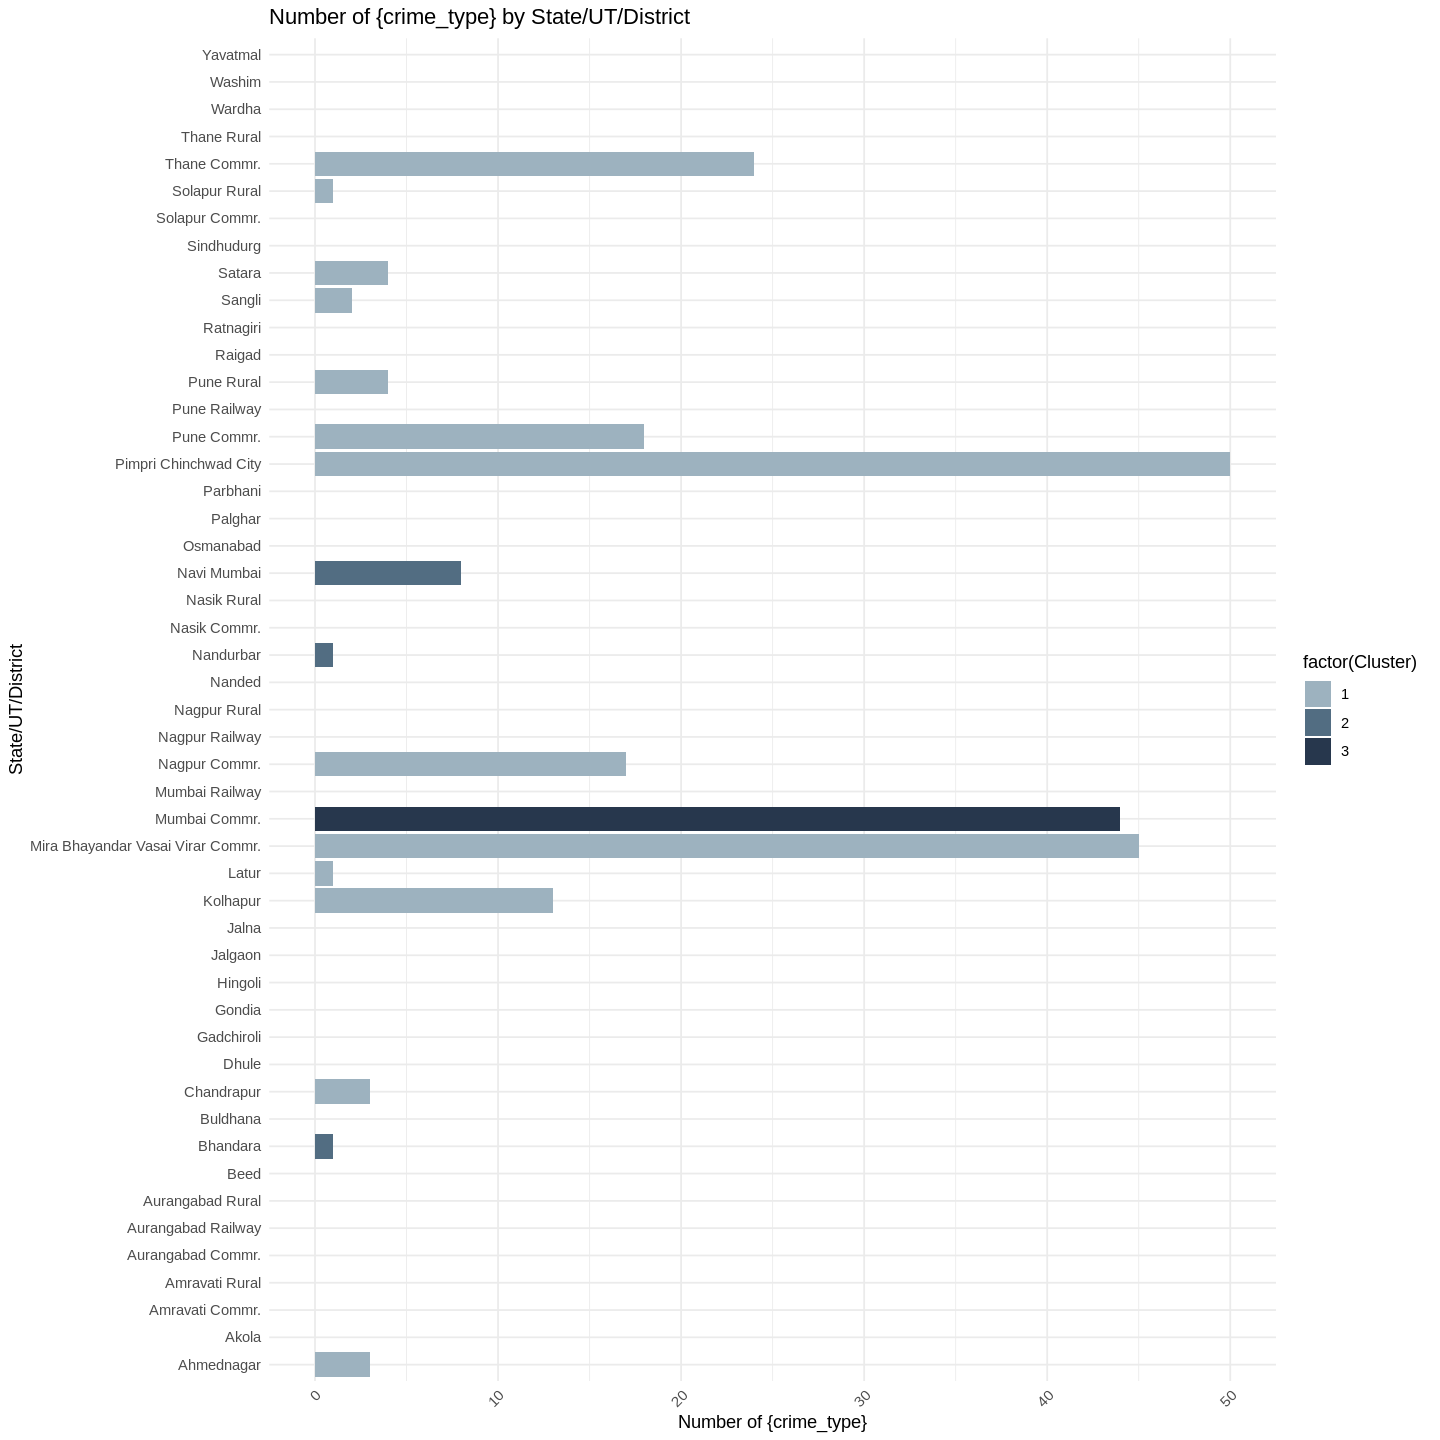

In [ ]:
plot_crime_state(Maharashtra_IPCCrimes2022_proc,`Human Trafficking`)

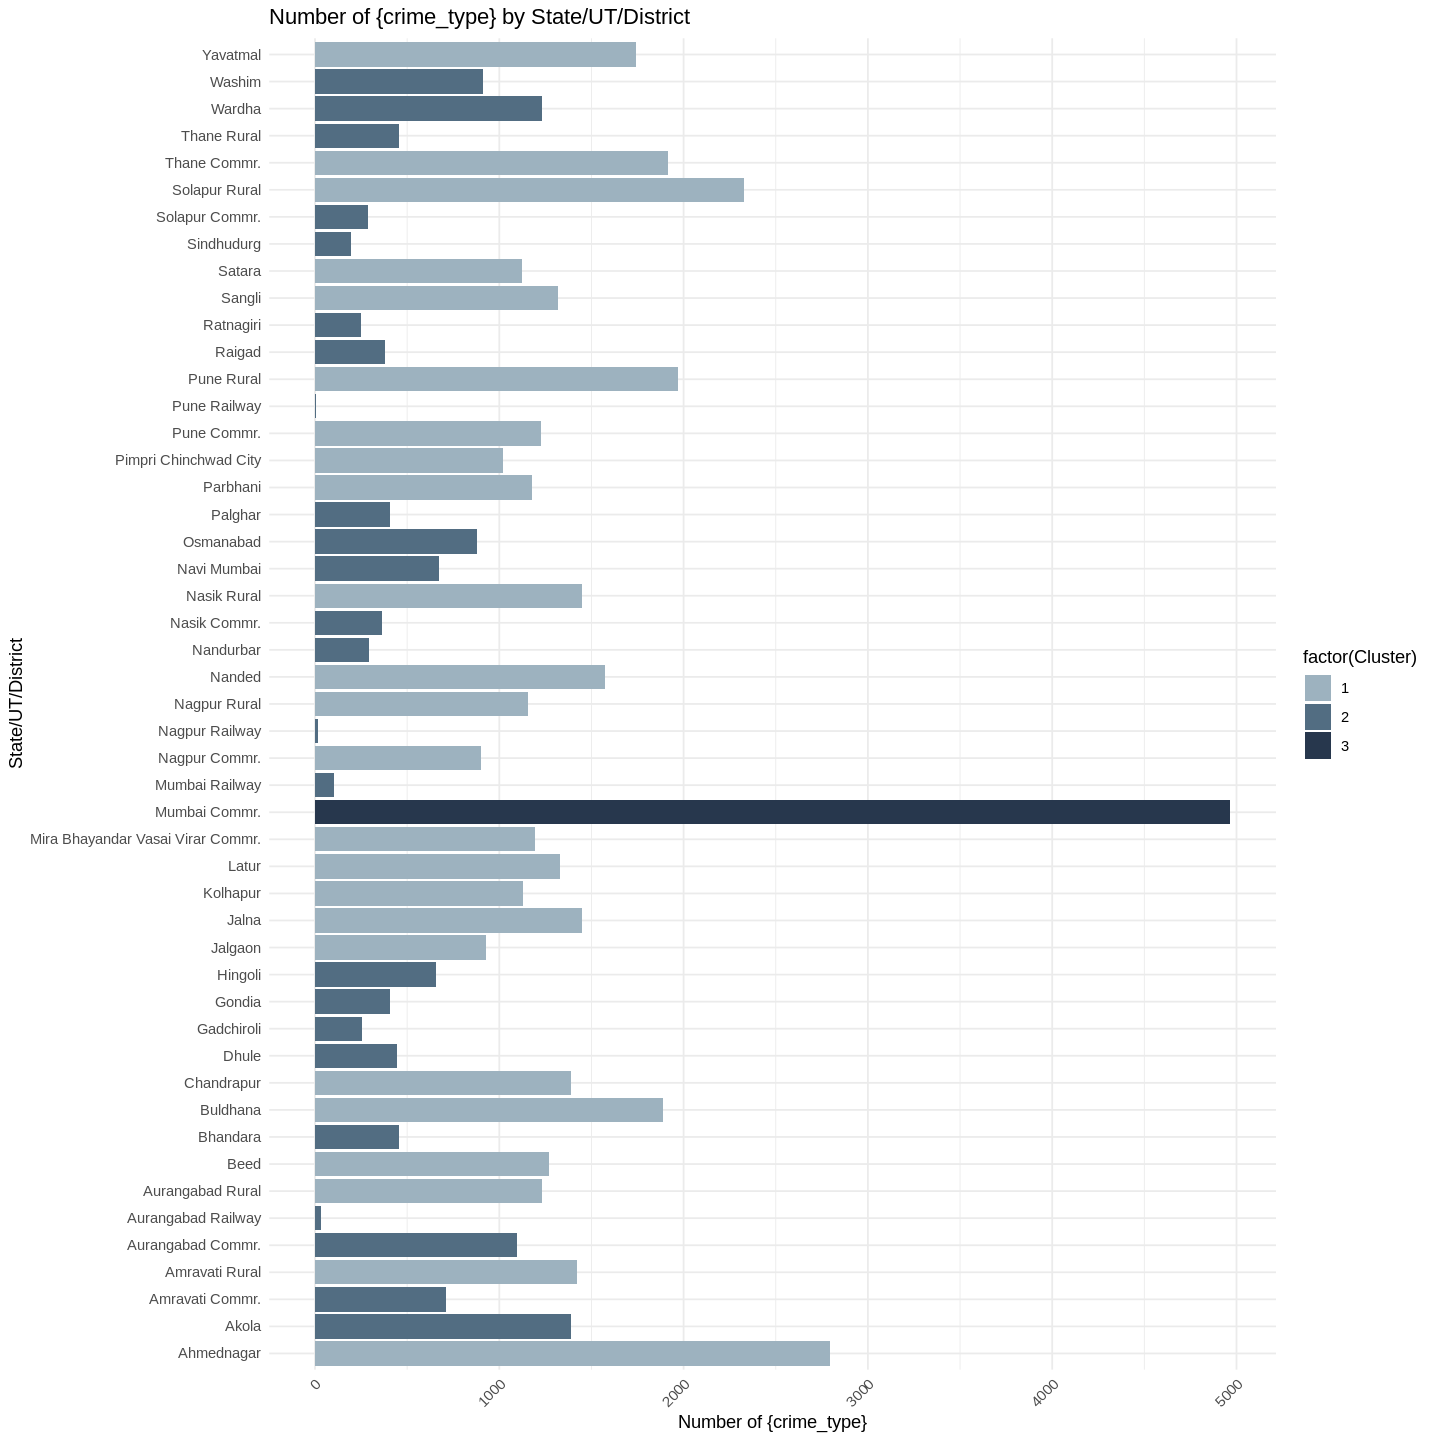

In [ ]:
plot_crime_state(Maharashtra_IPCCrimes2022_proc,`Hurt\n`)

In [ ]:
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’




In [ ]:
library(ggcorrplot)

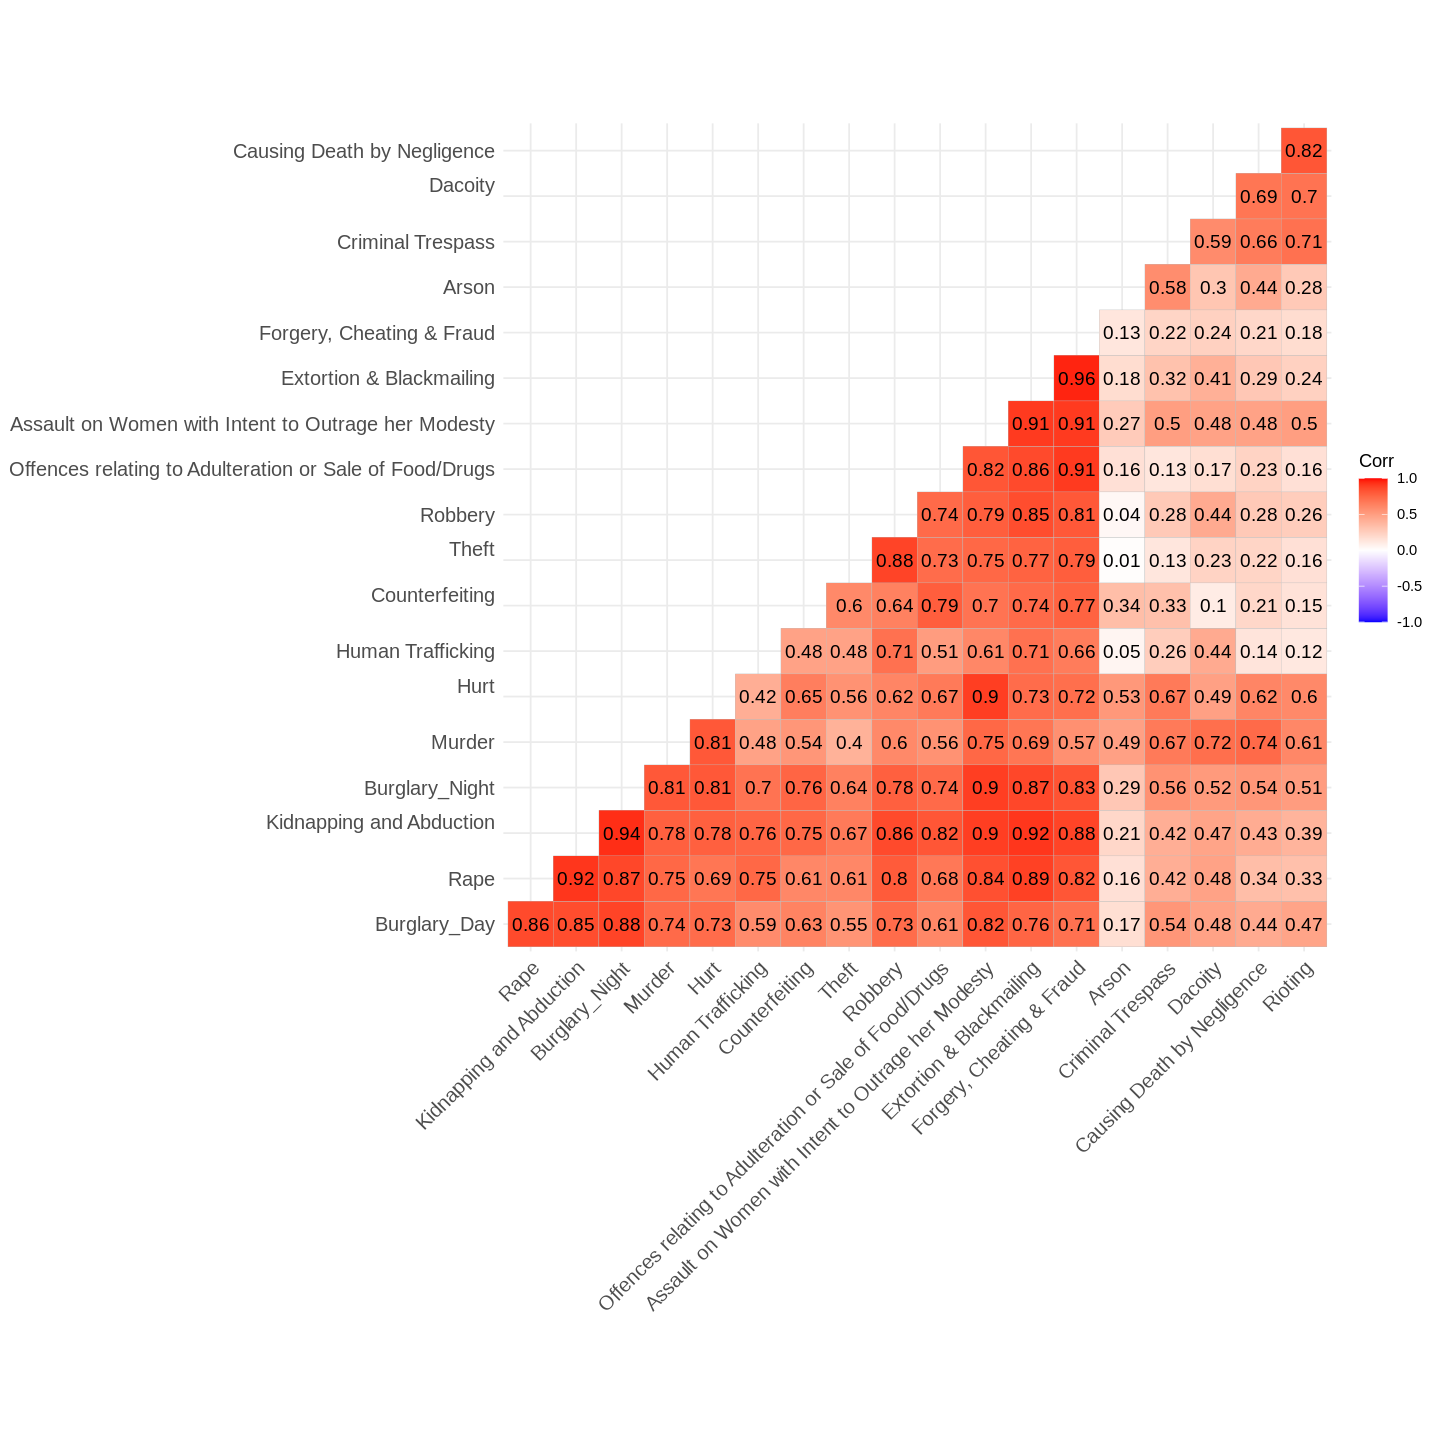

In [ ]:
correlation_mat <- function(df){
  Correlation_matrix <- cor(df[, -c(1,21)])
  cor_mat <- ggcorrplot(Correlation_matrix, hc.order = TRUE, type = "lower",lab = TRUE)
  cor_mat
}

correlation_mat(Maharashtra_IPCCrimes2022_proc)

>From the Correlation graph and the previous visulaization b/w state-crime, it can be infered that for a given city/state - various types of **crimes seems to be inter-correalted**, if say Murder if prevelant in a state then other crimes like Kidnapping, Rape, Burglary etc also seems to be prevelent.

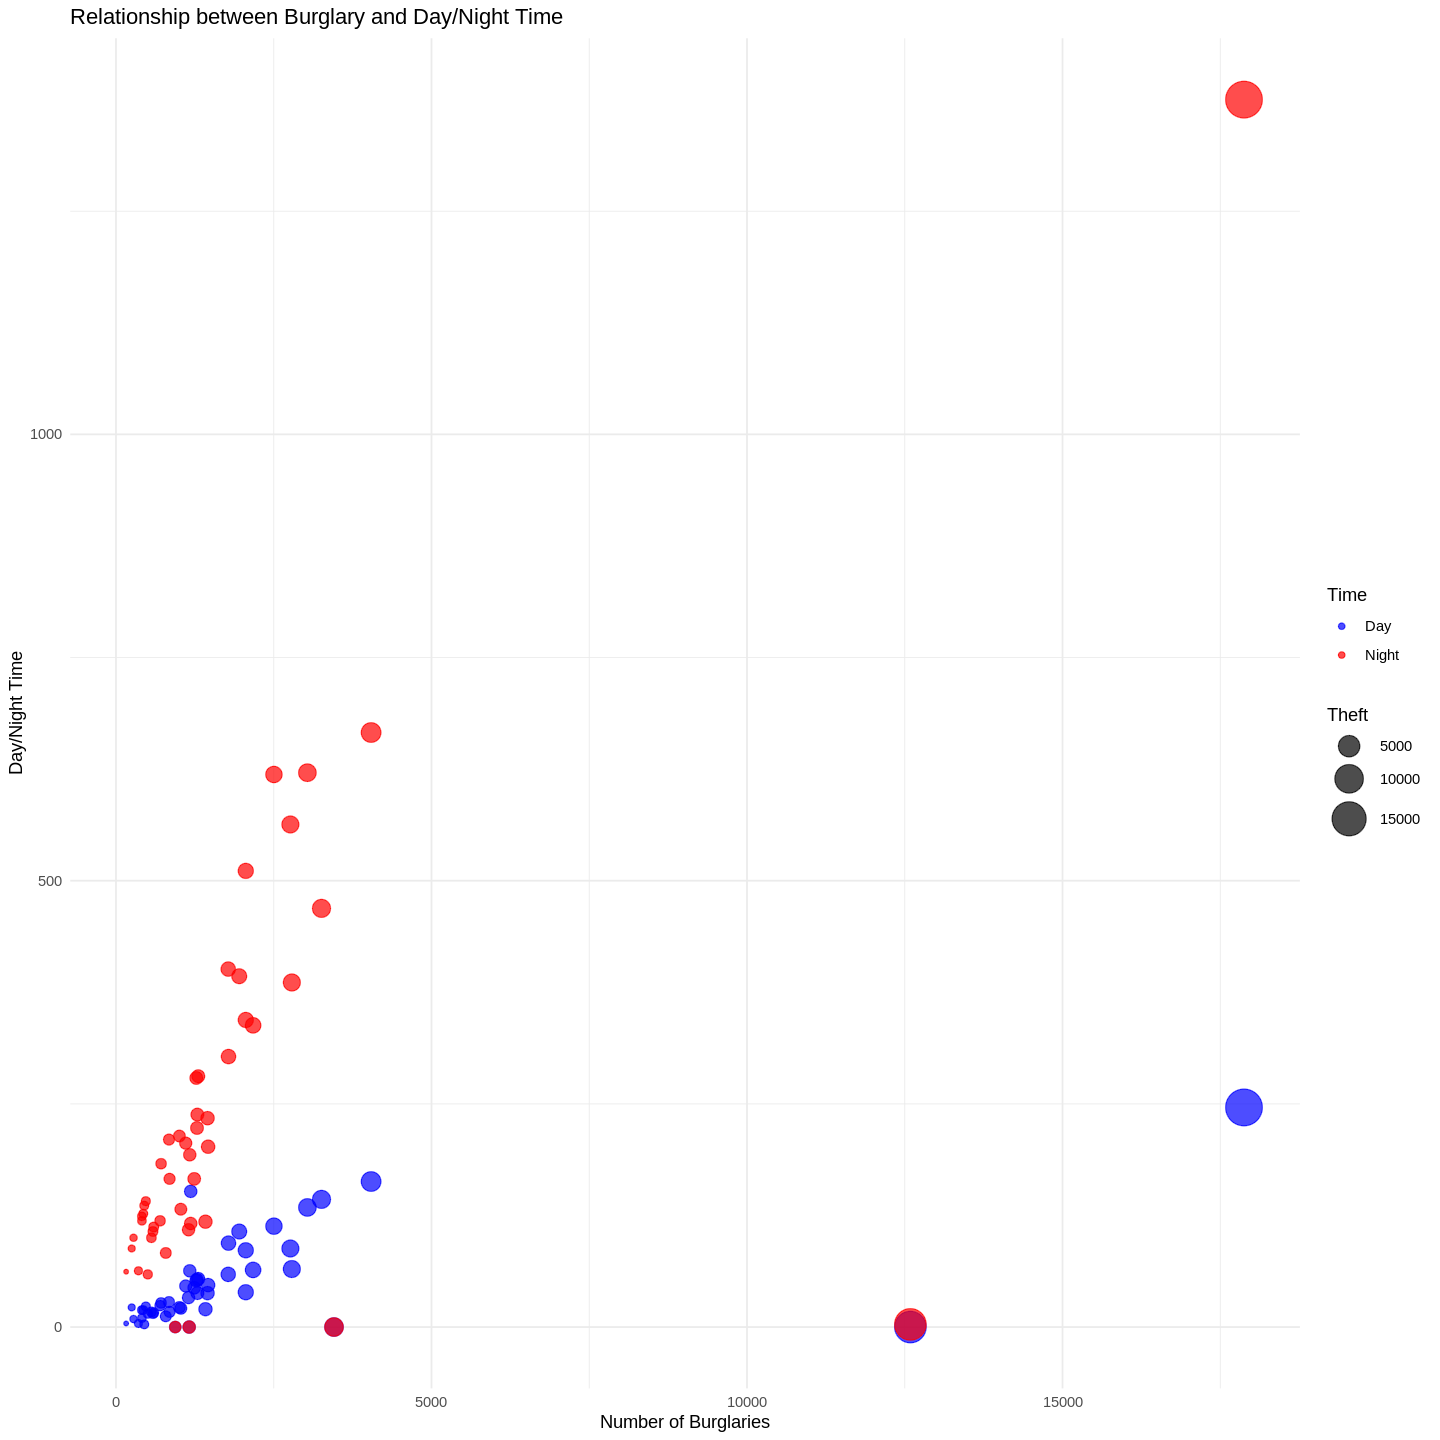

In [ ]:
burglary_day <- Maharashtra_IPCCrimes2022_proc[, c("Theft\n", "Burglary_Day")]
burglary_night <- Maharashtra_IPCCrimes2022_proc[, c("Theft\n", "Burglary_Night")]

names(burglary_day) <- c("Theft", "DayNight")
names(burglary_night) <- c("Theft", "DayNight")

burglary_day$Time <- "Day"
burglary_night$Time <- "Night"
burglary_combined <- rbind(burglary_day, burglary_night)

ggplot(burglary_combined, aes(x = Theft, y = DayNight, color = Time, size = Theft)) +
  geom_point(alpha = 0.7) +
  scale_size_continuous(range = c(1, 10)) +
  scale_color_manual(values = c("blue", "red")) +
  labs(x = "Number of Burglaries", y = "Day/Night Time", title = "Relationship between Burglary and Day/Night Time") +
  theme_minimal()

>Night Time sees more Burglary compared to Day as expected.

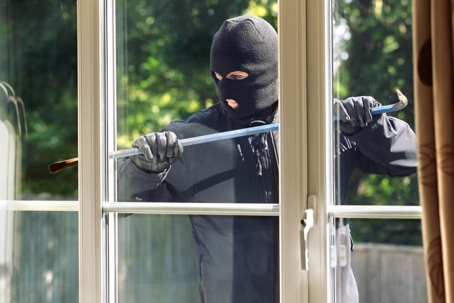

In [ ]:
# @title Robbery
image_url = "https://www.cmcdefense.com/cms/thumbnails/00/540x303/images/blog/California-Burglary-Law-1-min.2006250936550.jpg"

display_img(image_url)

In [ ]:
colnames(Maharashtra_IPCCrimes2022_proc)

[1] "State/UT/District"                                      
 [2] "Murder"                                                 
 [3] "Causing Death by Negligence"                            
 [4] "Hurt\n"                                                 
 [5] "Assault on Women with Intent to Outrage her Modesty"    
 [6] "Kidnapping and Abduction\n"                             
 [7] "Human Trafficking"                                      
 [8] "Rape"                                                   
 [9] "Rioting\n"                                              
[10] "Theft\n"                                                
[11] "Burglary_Day"                                           
[12] "Burglary_Night"                                         
[13] "Extortion & Blackmailing"                               
[14] "Robbery"                                                
[15] "Dacoity\n"                                              
[16] "Counterfeiting\n"                                       
[17] "Forgery, Cheating & Fraud"                              
[18] "Offences relating to Adulteration or Sale of Food/Drugs"
[19] "Arson"                                                  
[20] "Criminal Trespass"                                      
[21] "Cluster"

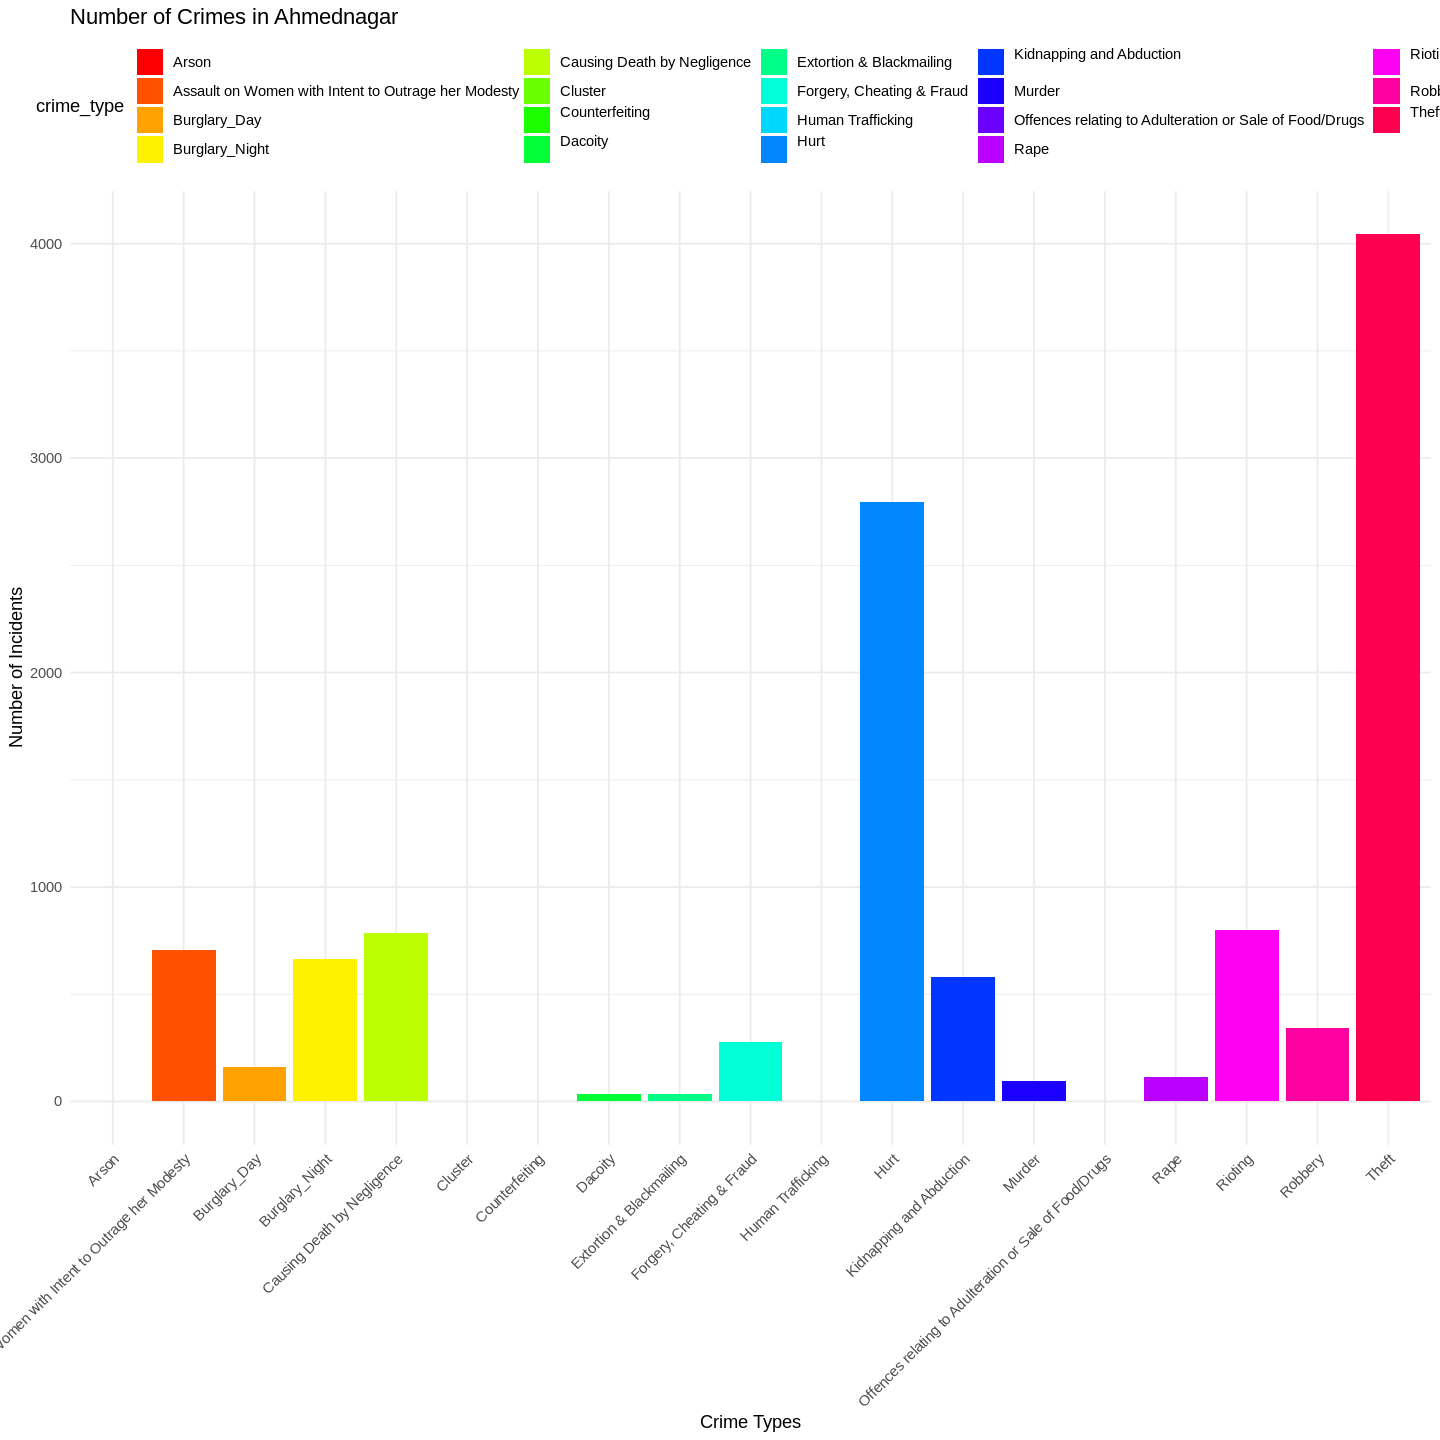

In [ ]:
state_crime_dist <- function(df,state){
  state_row <- df[df$`State/UT/District` == state, ]

  crime_counts <- state_row[, -c(1,20)]

  crime_types <- colnames(crime_counts)

  crime_data <- data.frame(
    crime_type = rep(crime_types, each = nrow(crime_counts)),
    incidents = as.vector(t(crime_counts))
  )


  ggplot(crime_data, aes(x = crime_type, y = incidents, fill = crime_type)) +
    geom_bar(stat = "identity", position = "dodge") +
    scale_fill_manual(values = rainbow(length(crime_types))) +
    labs(
      title = "Number of Crimes in Ahmednagar",
      x = "Crime Types",
      y = "Number of Incidents"
    ) +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1),
      legend.position = "top"
    )
}

state_crime_dist(Maharashtra_IPCCrimes2022_proc,"Ahmednagar")

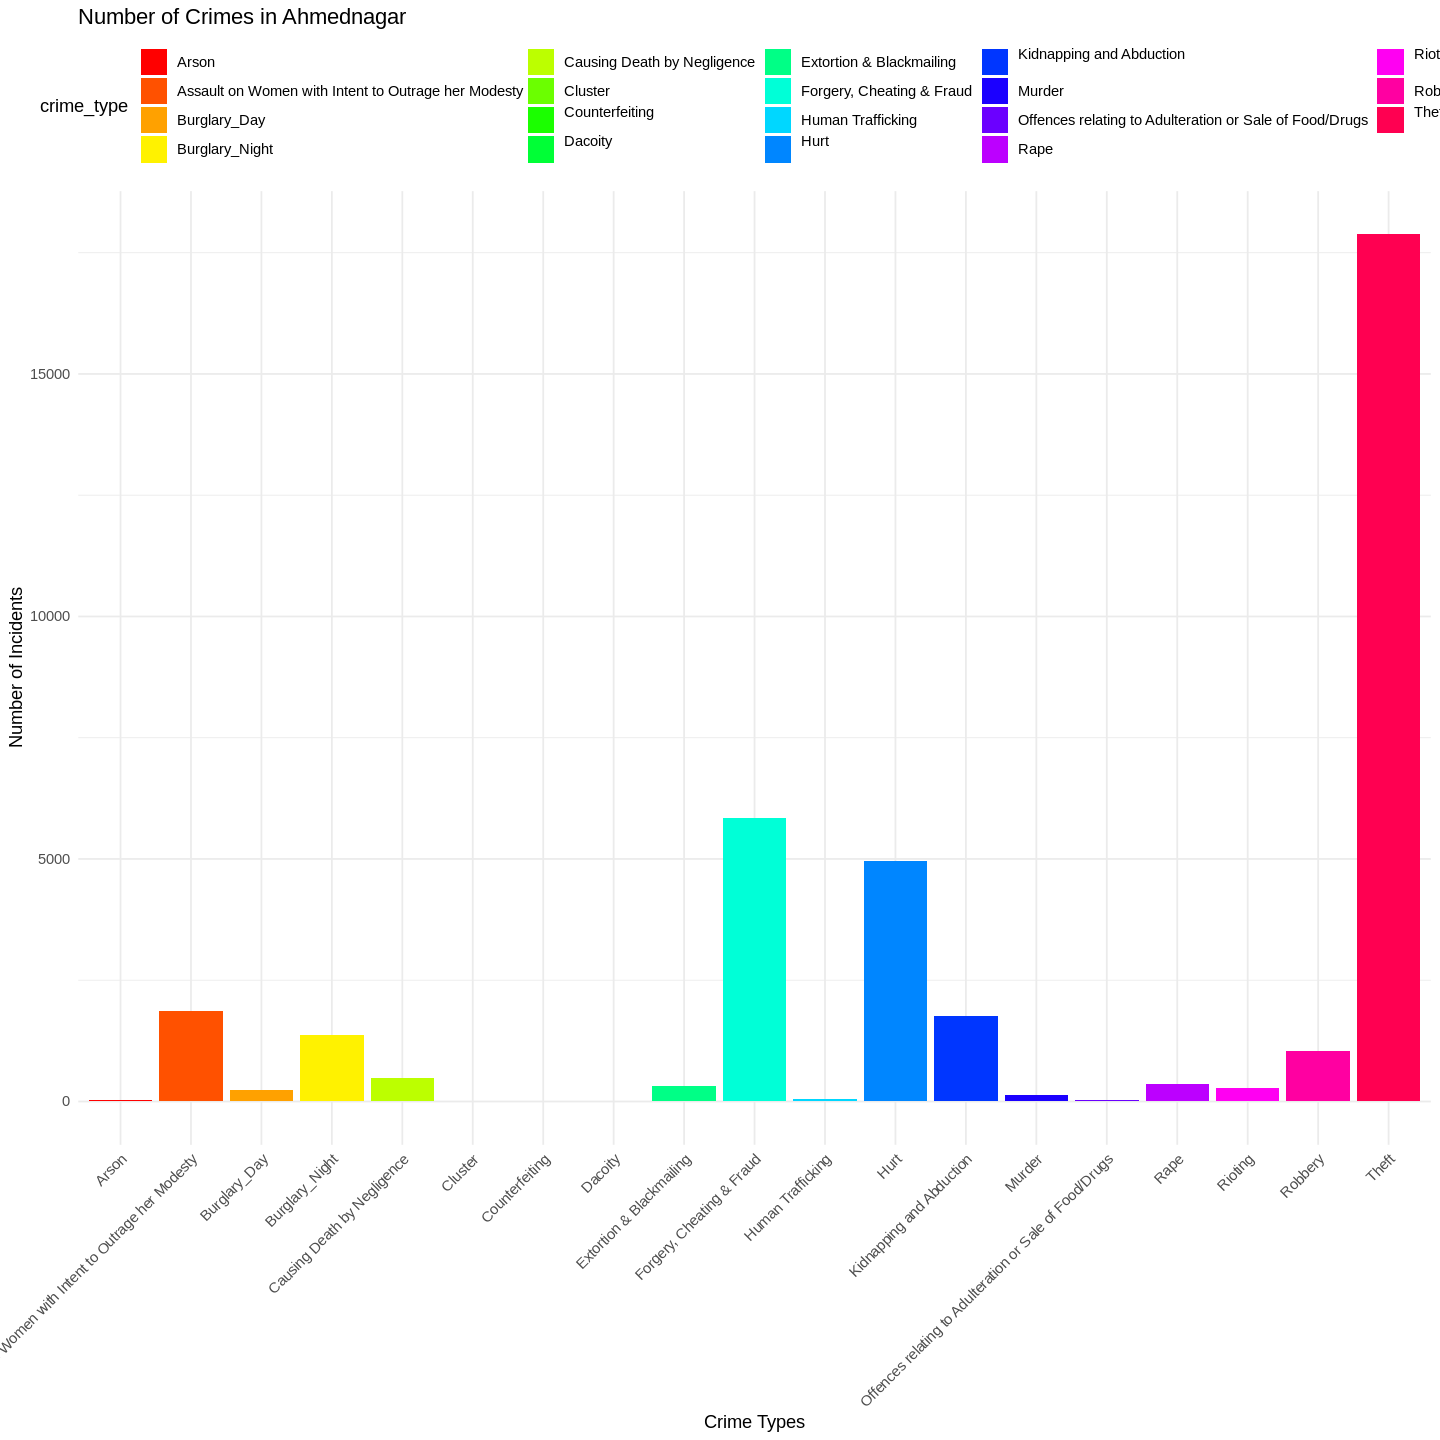

In [ ]:
state_crime_dist(Maharashtra_IPCCrimes2022_proc,"Mumbai Commr.")

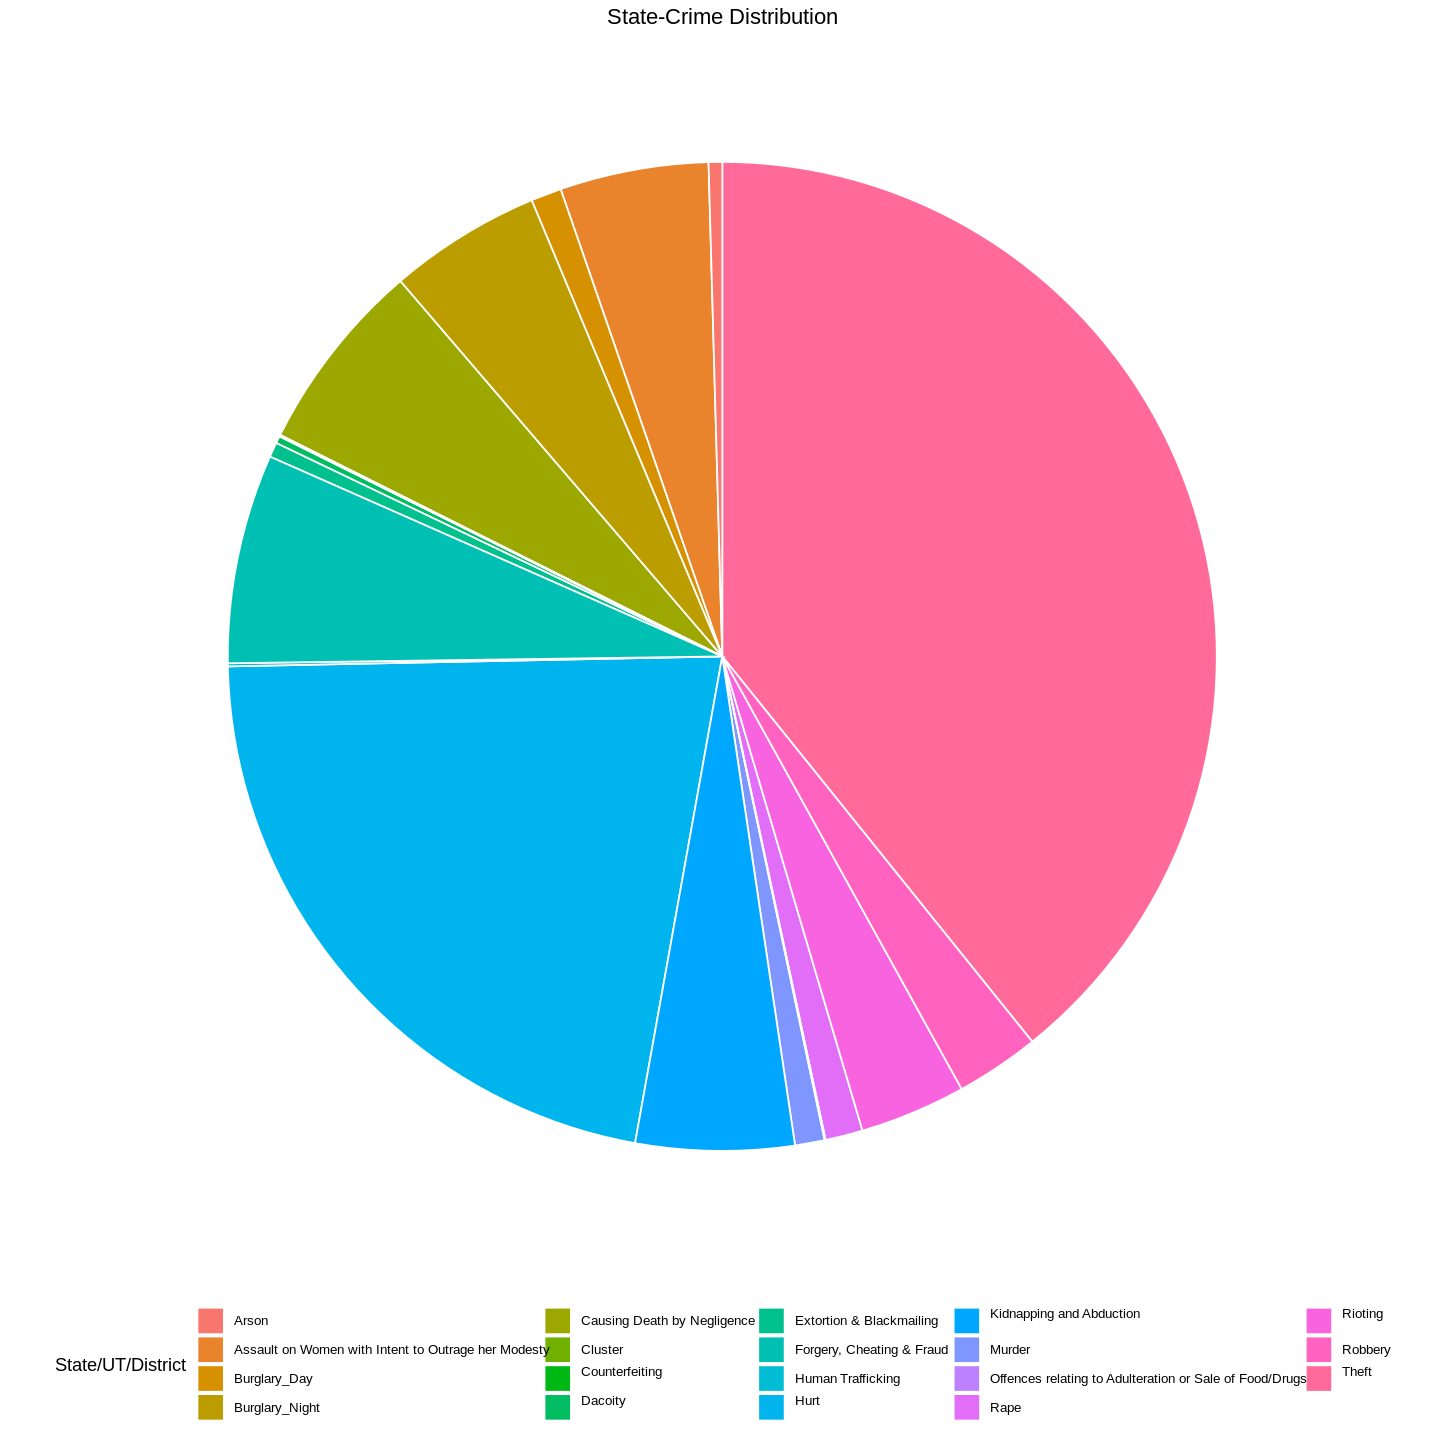

In [ ]:
state_totals <- colSums(Maharashtra_IPCCrimes2022_proc[, -c(1, 20)])  # Exclude the first column (State/UT/District)

pie_data <- data.frame(state = names(state_totals), count = state_totals)
pie_data$percent <- pie_data$count / sum(pie_data$count) * 100

pie_chart <- ggplot(pie_data, aes(x = "", y = count, fill = state)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  # geom_text(aes(label = paste0(round(percent), "%")),
  #           size = 4.5,
  #           position = position_stack(vjust = 0.5),
  #          ) +
  coord_polar(theta = "y") +
  labs(title = "State-Crime Distribution", fill = "State/UT/District") +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    legend.title.align = 0.5,
    plot.title = element_text(hjust = 0.5),
    legend.text = element_text(size = 8),
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank()
  )

print(pie_chart)


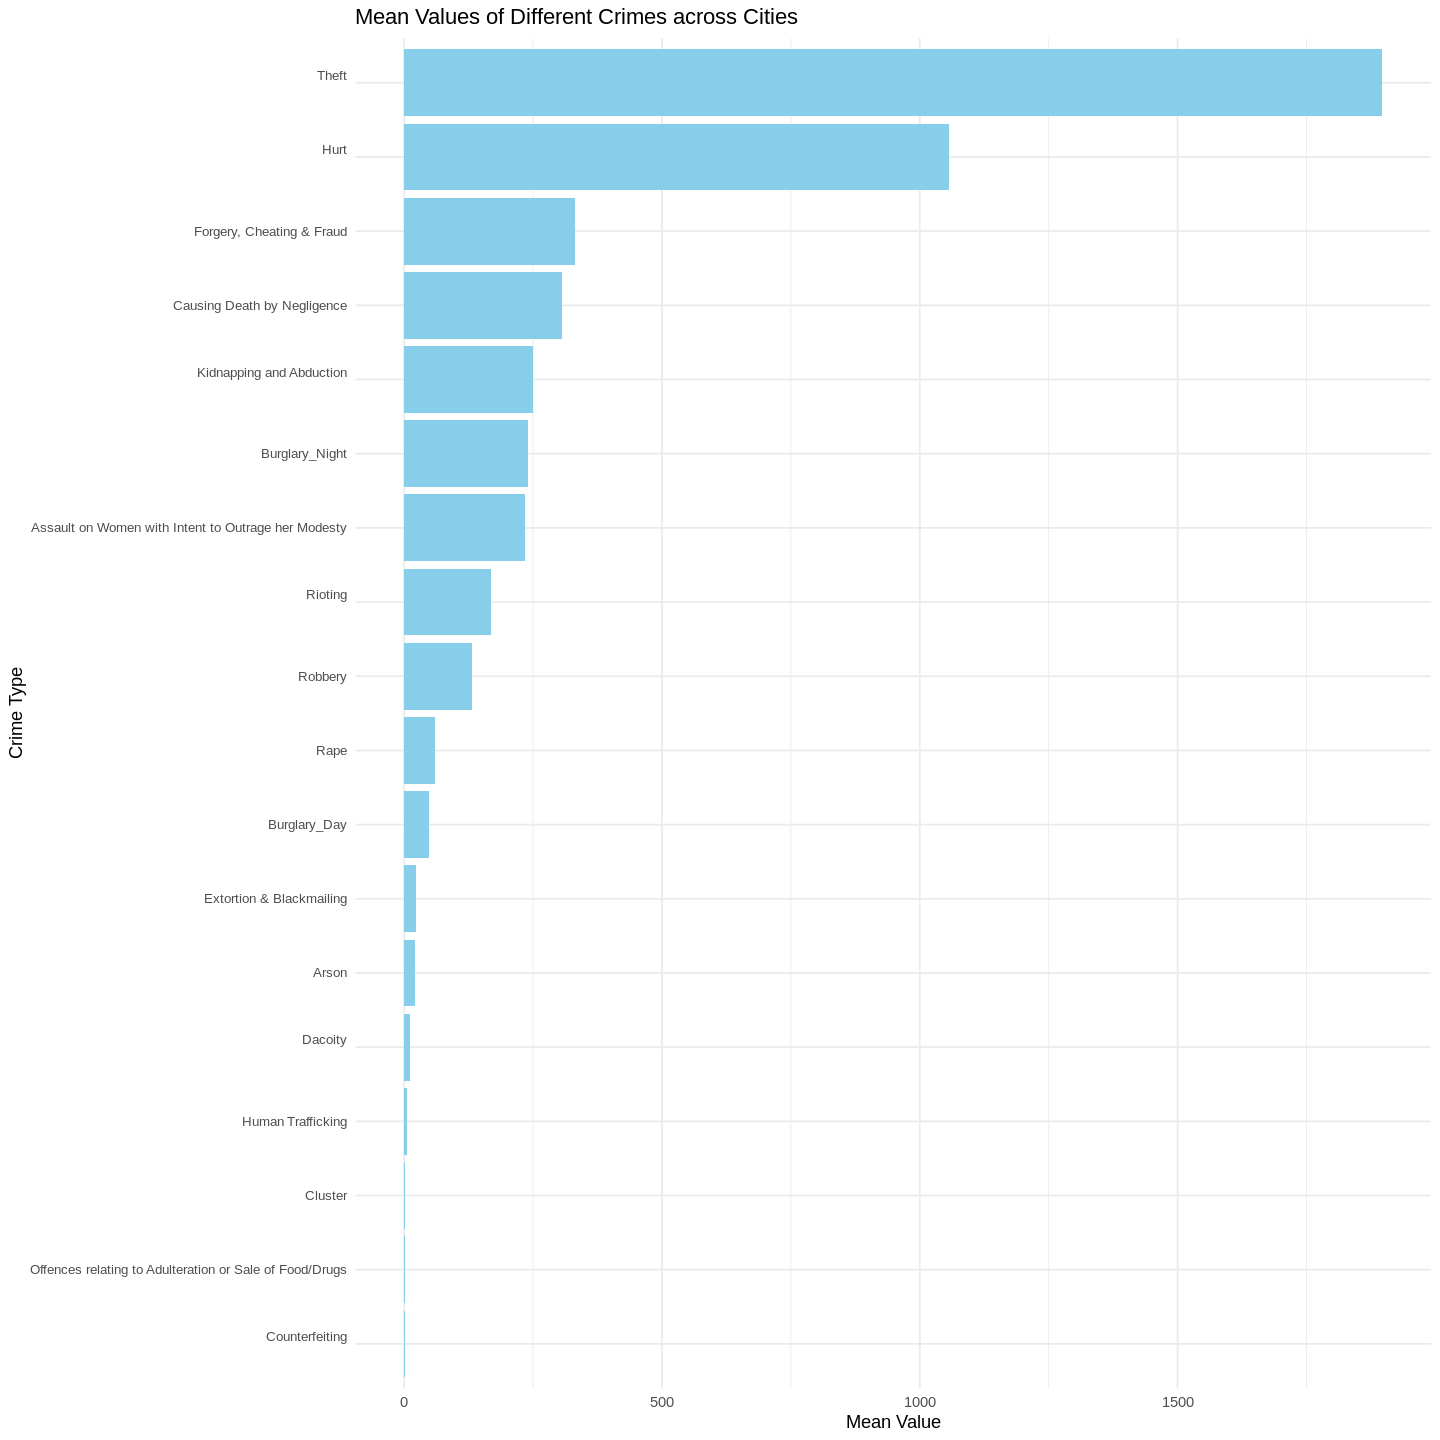

In [ ]:
crime_means <- colMeans(Maharashtra_IPCCrimes2022_proc[, -c(1,20)], na.rm = TRUE)

crime_means_df <- data.frame(Crime_Type = names(crime_means)[-1], Mean_Value = crime_means[-1])

crime_means_df <- crime_means_df[order(crime_means_df$Mean_Value, decreasing = TRUE), ]

ggplot(crime_means_df, aes(x = reorder(Crime_Type, Mean_Value), y = Mean_Value)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +
  labs(x = "Crime Type", y = "Mean Value", title = "Mean Values of Different Crimes across Cities") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8))

In [ ]:
Crime_Type = c("Murder (Sec.302 IPC)",
               #death due to negligence - hit and run, medical negligence etc
               "Causing Death by Negligence (Sec.304-A IPC) (Col.6+Col 9 to 12)",
               "Hurt (Total) (Col.20 + Col.26)\r\n",
               "Assault on Women with Intent to Outrage her Modesty (Sec.354 IPC) (Total) (Col.36+Col.37+Col42 to 44)",
               "Kidnapping and Abduction (Total) (Col.46+ Col.49 to Col.55)\r\n",
               "Human Trafficking (U/S 370)",
               "Rape (Sec.376 IPC)",
               "Rioting (Total) (Col.70 to Col.85)\r\n",
               "Theft (Total) (Col.92+Col.93)\r\n",
               #Burglary (Total) (Col.95 + Col.96)
               "A) Day Time",
               "B) Night",
               "Extortion & Blackmailing (Sec.384 to 389 IPC)",
               "Robbery  (Sec.392/394/397 IPC)",
               "Dacoity  (Total) (Col.101+ Col.102)\r\n",
               "Counterfeiting (Total) (Col.109 to 112)\r\n",
               "Forgery, Cheating & Fraud  (Total) (Col.114+Col.119+Col.120)",
               "Offences relating to Adulteration or Sale of Food/Drugs (Sec.272/273/274/275/276 IPC)",
               "Arson (Sec.435, 436 & 438 IPC)",
               "Criminal Trespass (Sec.447 to 452 IPC)"
              )


In [ ]:
Andhra_Pradesh_IPCCrimes2022 <- read_excel("/content/sample_data/Andhra Pradesh_IPCCrimes2022.xlsx")

Andhra_Pradesh_IPCCrimes2022_proc <- Andhra_Pradesh_IPCCrimes2022[, c("State/UT/District",Crime_Type)]
col_names <- colnames(Andhra_Pradesh_IPCCrimes2022_proc)

new_column_names <- gsub("\\s*\\([^\\)]+\\)", "", col_names)
colnames(Andhra_Pradesh_IPCCrimes2022_proc) <- new_column_names
names(Andhra_Pradesh_IPCCrimes2022_proc)[which(names(Andhra_Pradesh_IPCCrimes2022_proc) == "A) Day Time")] <- "Burglary_Day"
names(Andhra_Pradesh_IPCCrimes2022_proc)[which(names(Andhra_Pradesh_IPCCrimes2022_proc) == "B) Night")] <- "Burglary_Night"

names(Andhra_Pradesh_IPCCrimes2022_proc)[which(names(Andhra_Pradesh_IPCCrimes2022_proc) == "Hurt\r\n")] <- "Hurt\n"
names(Andhra_Pradesh_IPCCrimes2022_proc)[which(names(Andhra_Pradesh_IPCCrimes2022_proc) == "Kidnapping and Abduction\r\n")] <- "Kidnapping and Abduction\n"
names(Andhra_Pradesh_IPCCrimes2022_proc)[which(names(Andhra_Pradesh_IPCCrimes2022_proc) == "Rioting\r\n")] <- "Rioting\n"
names(Andhra_Pradesh_IPCCrimes2022_proc)[which(names(Andhra_Pradesh_IPCCrimes2022_proc) == "Theft\r\n")] <- "Theft\n"
names(Andhra_Pradesh_IPCCrimes2022_proc)[which(names(Andhra_Pradesh_IPCCrimes2022_proc) == "Dacoity\r\n")] <- "Dacoity\n"
names(Andhra_Pradesh_IPCCrimes2022_proc)[which(names(Andhra_Pradesh_IPCCrimes2022_proc) == "Counterfeiting\r\n")] <- "Counterfeiting\n"
names(Andhra_Pradesh_IPCCrimes2022_proc)[which(names(Andhra_Pradesh_IPCCrimes2022_proc) == "	Criminal Trespass\r\n")] <- "	Criminal Trespass"

head(Andhra_Pradesh_IPCCrimes2022_proc)

# colnames(Maharashtra_IPCCrimes2022_proc)

New names:
• `Affray (Sec.159 & 160 IPC)` -> `Affray (Sec.159 & 160 IPC)...89`
• `Affray (Sec.159 & 160 IPC)` -> `Affray (Sec.159 & 160 IPC)...90`


State/UT/District,Murder,Causing Death by Negligence,Hurt,Assault on Women with Intent to Outrage her Modesty,Kidnapping and Abduction,Human Trafficking,Rape,Rioting,Theft,Burglary_Day,Burglary_Night,Extortion & Blackmailing,Robbery,Dacoity,Counterfeiting,"Forgery, Cheating & Fraud",Offences relating to Adulteration or Sale of Food/Drugs,Arson,Criminal Trespass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alluri Sitharama Raju,29,144,126,20,5,0,34,5,46,10,21,0,1,0,3,35,13,4,38
Anakapalli,16,352,640,244,26,1,37,3,264,18,110,7,8,0,0,138,39,20,291
Anantapuramu,51,310,1118,174,31,2,12,23,405,50,114,11,7,1,1,442,371,25,111
Annamayya,37,292,1147,126,10,3,11,24,275,12,88,6,5,1,1,171,159,13,107
Bapatla,42,255,1442,187,15,0,22,5,391,34,129,5,5,6,0,217,3,22,76
Chittoor,30,356,1158,196,14,2,12,15,374,31,93,15,7,1,1,185,0,11,156


In [ ]:
library(dplyr)

combined_data <- bind_rows(Maharashtra_IPCCrimes2022_proc[,-20], Andhra_Pradesh_IPCCrimes2022_proc, .id = "State")
combined_data <- combined_data[,-2]
head(combined_data)

State,Murder,Causing Death by Negligence,Hurt,Assault on Women with Intent to Outrage her Modesty,Kidnapping and Abduction,Human Trafficking,Rape,Rioting,Theft,⋯,Burglary_Night,Extortion & Blackmailing,Robbery,Dacoity,Counterfeiting,"Forgery, Cheating & Fraud",Offences relating to Adulteration or Sale of Food/Drugs,Arson,Cluster,Criminal Trespass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,94,786,2797,707,580,3,112,800,4043,⋯,666,35,342,36,0,279,0,0,1,NA
1,37,131,1388,218,122,0,28,54,789,⋯,83,18,40,2,1,89,0,23,2,NA
1,32,95,713,262,112,0,55,15,1184,⋯,116,5,66,4,0,141,2,14,2,NA
1,55,338,1423,174,171,0,35,42,1028,⋯,132,3,25,6,1,112,0,36,1,NA
1,43,188,1095,240,224,0,49,108,1418,⋯,118,18,132,6,1,283,0,20,2,NA
1,42,440,1232,215,127,0,31,295,1150,⋯,109,3,74,20,0,110,0,26,1,NA


In [ ]:
crime <- "Murder"
state_crime_totals <- combined_data %>%
  group_by(State) %>%
  summarise(total_crime = sum(get(crime), na.rm = TRUE))


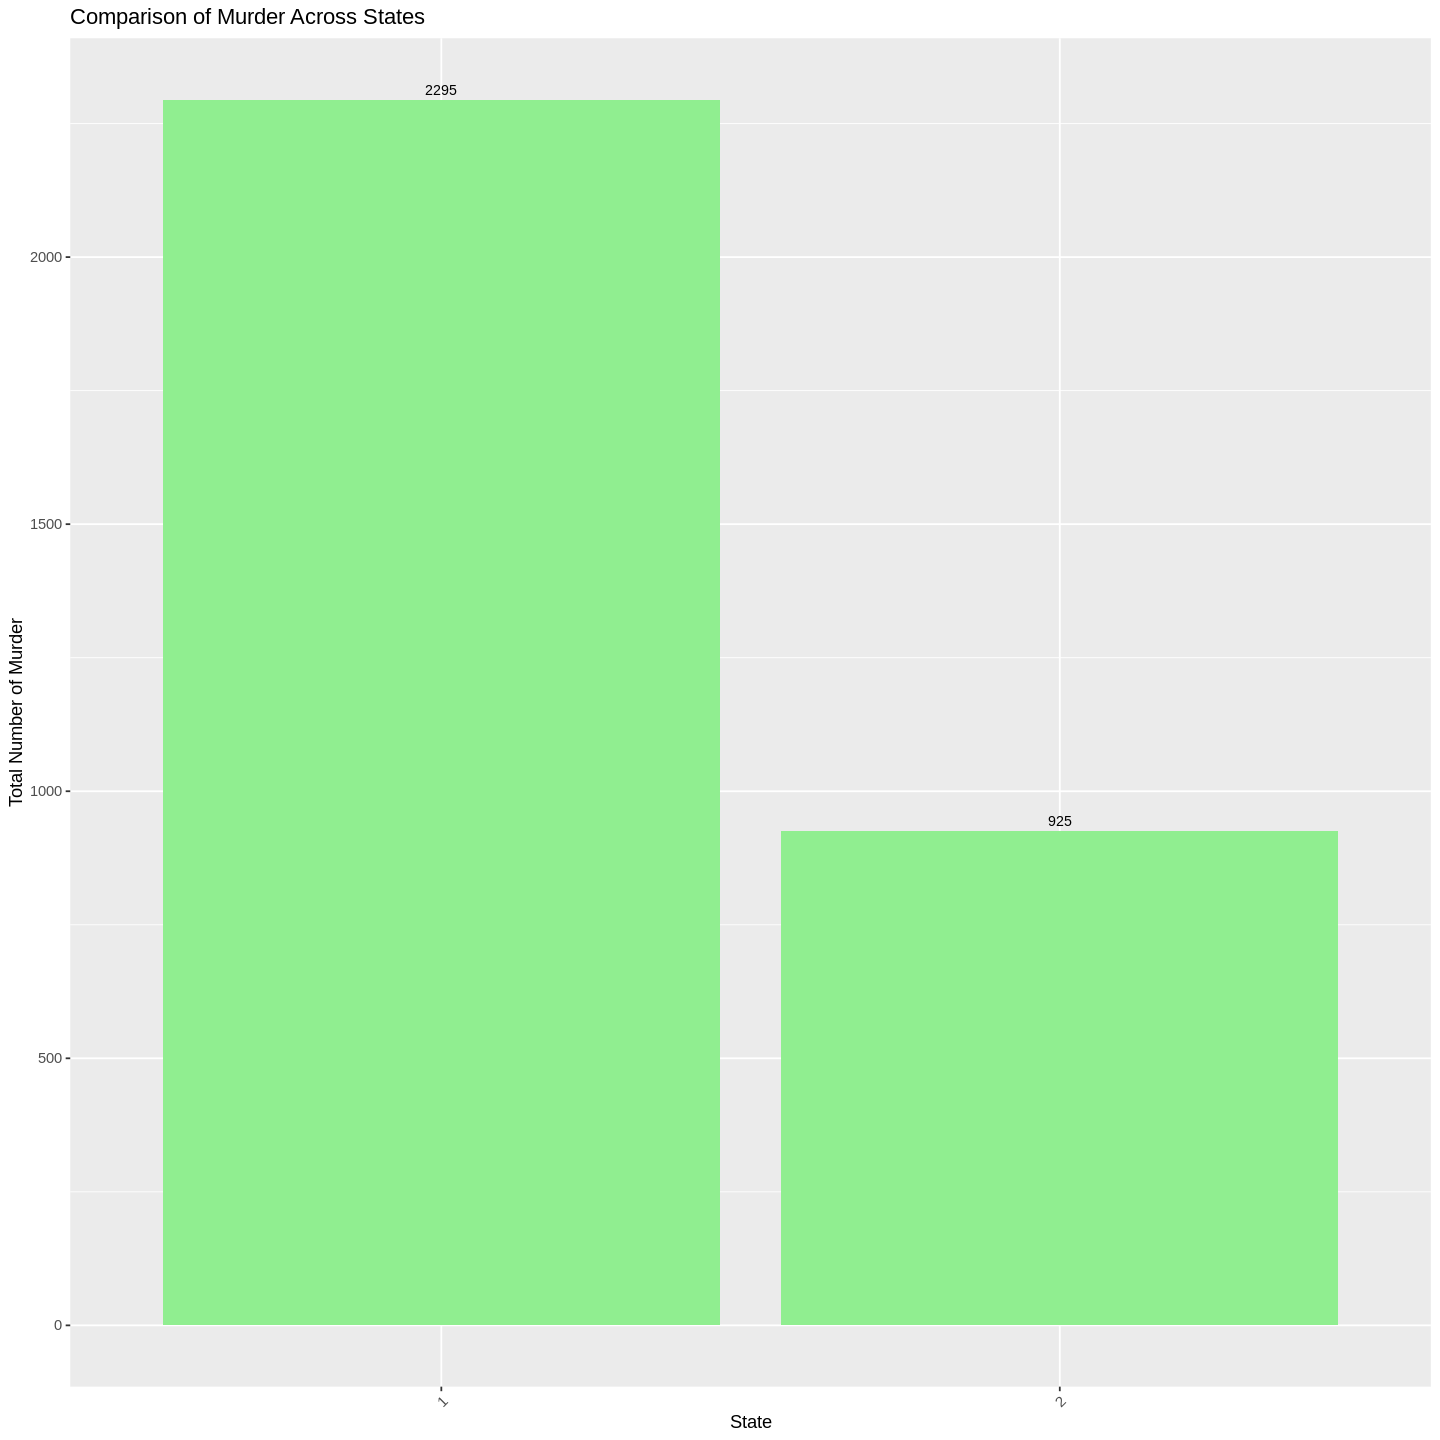

In [ ]:

ggplot(state_crime_totals, aes(x = State, y = total_crime)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  geom_text(aes(label = total_crime), vjust = -0.5, color = "black", size = 3) +
  labs(x = "State", y = paste("Total Number of", crime), title = paste("Comparison of", crime, "Across States")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

**Result and Findings**

1.   *Crime Distribution by State:* The analysis reveals the distribution of various types of crimes across different states or districts within Maharashtra and Andhra Pradesh. This provides insights into regions with higher crime rates and identifies specific crimes that are more prevalent in certain areas.

2.   *Correlation Analysis:* By examining the correlation matrix of different crime types, the project identifies patterns of association between various crimes. For example, the analysis find that certain types of crimes, such as rioting and dacoity, are positively correlated, indicating potential connections in criminal behavior.

3.   *Time-based Analysis:* The analysis of crime rates during different times of the day (day vs. night) uncovers temporal patterns in criminal activities. For instance, the project reveal that burglaries are more common at night compared to during the day.

4.   *Clustering Analysis:* The application of hierarchical clustering groups districts based on their crime profiles. Analyzing these clusters helps in understanding similarities or differences in crime patterns across different regions.

5.   *Temporal Patterns:* The analysis uncovers insights into when certain types of crimes are more likely to occur, allowing for the implementation of preventive measures and strategic deployment of law enforcement resources during peak crime hours.

